In [120]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing Nans and preparing data (no centralisation yet)

In [121]:
data = pd.read_table('part3_data.csv',delimiter = ',',index_col = 0)
data.drop_duplicates()
data['drv_sex2'].fillna('N',inplace = True)
data.dropna(inplace = True)
data.head()

,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,...,vh_weight,town_mean_altitude,town_surface_area,population,commune_code,canton_code,city_district_code,regional_department_code,claim_amount,made_claim
id_policy,,,,,,,,,,,,,,,,,,,,,
A00013211-V01,0.5,Maxi,36,6,Biannual,No,Retired,68269,No,77,...,1260,526.0,3216.0,4.8,269.0,20.0,5.0,68,0.0,0
A00040885-V01,0.5,Maxi,15,5,Yearly,No,WorkPrivate,29019,Yes,52,...,1480,57.0,4912.0,141.3,19.0,99.0,1.0,29,0.0,0
A00044495-V01,0.5,Mini,16,6,Monthly,No,Professional,13080,No,52,...,2931,257.0,4488.0,5.3,80.0,27.0,1.0,13,0.0,0
A00047266-V01,0.5,Maxi,11,7,Biannual,No,WorkPrivate,10387,No,67,...,930,109.0,1339.0,61.2,387.0,99.0,3.0,10,0.0,0
A00074532-V01,0.5,Median2,16,6,Biannual,No,WorkPrivate,59153,Yes,60,...,1035,24.0,1849.0,9.7,153.0,19.0,6.0,59,0.0,0


# PCA Mate

In [122]:
# LABEL ENCODE REGIONAL CODE:::::
# le = LabelEncoder()
# le.fit(data.regional_department_code)
# data.regional_department_code = le.transform(data.regional_department_code)

In [123]:
string_cols = data.select_dtypes([object]).columns
string_cols

Index(['pol_coverage', 'pol_pay_freq', 'pol_payd', 'pol_usage',
       'pol_insee_code', 'drv_drv2', 'drv_sex1', 'drv_sex2', 'vh_fuel',
       'vh_make', 'vh_model', 'vh_type', 'regional_department_code'],
      dtype='object')

In [124]:
PCA_cols = data.select_dtypes(exclude = [object]).columns
PCA_cols

Index(['pol_bonus', 'pol_duration', 'pol_sit_duration', 'drv_age1', 'drv_age2',
       'drv_age_lic1', 'drv_age_lic2', 'vh_age', 'vh_cyl', 'vh_din',
       'vh_sale_begin', 'vh_sale_end', 'vh_speed', 'vh_value', 'vh_weight',
       'town_mean_altitude', 'town_surface_area', 'population', 'commune_code',
       'canton_code', 'city_district_code', 'claim_amount', 'made_claim'],
      dtype='object')

[8.71745052e-01 1.12626867e-01 1.25727440e-02 1.08166229e-03
 9.82918052e-04 5.71853989e-04 3.41968735e-04 4.38539918e-05
 1.09234324e-05 8.40766308e-06 5.29857754e-06 4.54740465e-06
 1.26233688e-06 8.28334053e-07 8.10341216e-07 6.81428160e-07
 1.95097700e-07 5.00690220e-08 3.11154785e-08 2.44957052e-08
 2.01823218e-08]


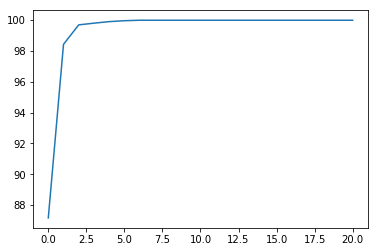

In [125]:
data_float = data[PCA_cols[:-1]]
pca = PCA(n_components=len(data_float.columns[:-1]))
pca.fit(data_float)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(range(0,len(data_float.columns[:-1])), var)
print(pca.explained_variance_ratio_)
plt.show()

In [126]:
# DROP USELESS COLUMNS NOW..
dropping_list = PCA_cols.drop(['pol_bonus','pol_duration','pol_sit_duration','drv_age1'])[:-2]
data.drop(columns = dropping_list,inplace=True)
data.head()

,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_sex1,drv_sex2,vh_fuel,vh_make,vh_model,vh_type,regional_department_code,claim_amount,made_claim
id_policy,,,,,,,,,,,,,,,,,,,
A00013211-V01,0.5,Maxi,36,6,Biannual,No,Retired,68269,No,77,M,N,Gasoline,RENAULT,SCENIC,Tourism,68,0.0,0
A00040885-V01,0.5,Maxi,15,5,Yearly,No,WorkPrivate,29019,Yes,52,M,F,Diesel,NISSAN,ALMERA TINO,Tourism,29,0.0,0
A00044495-V01,0.5,Mini,16,6,Monthly,No,Professional,13080,No,52,M,N,Diesel,LAND ROVER,DEFENDER,Commercial,13,0.0,0
A00047266-V01,0.5,Maxi,11,7,Biannual,No,WorkPrivate,10387,No,67,M,N,Gasoline,RENAULT,CLIO,Tourism,10,0.0,0
A00074532-V01,0.5,Median2,16,6,Biannual,No,WorkPrivate,59153,Yes,60,M,F,Diesel,CITROEN,ZX,Tourism,59,0.0,0


In [117]:
string_cols

Index(['pol_coverage', 'pol_pay_freq', 'pol_payd', 'pol_usage',
       'pol_insee_code', 'drv_drv2', 'drv_sex1', 'drv_sex2', 'vh_fuel',
       'vh_make', 'vh_model', 'vh_type', 'regional_department_code'],
      dtype='object')

In [140]:
one_hot_strings = string_cols[[1,2,3,6]]
one_hot_strings

Index(['pol_pay_freq', 'pol_payd', 'pol_usage', 'drv_sex1'], dtype='object')

In [168]:
one_hotted_dict = {}
for hot in one_hot_strings:
    values = data[hot].values
    # # Value encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # # binary encode
    onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    for n, index in enumerate(np.unique(values)):
        one_hotted_dict['{}_{}'.format(hot,index)] = onehot_encoded[:,n]

In [233]:
one_hot_data = pd.DataFrame.from_dict(one_hotted_dict)
float_data = data.select_dtypes(exclude = [object])
float_data.reset_index(inplace=True,drop=True)
final_dataset = pd.concat([float_data,one_hot_data],axis = 1)

# Evaluate, Train the thing